In [1]:
from occultence import *

(0.99, 1.015)

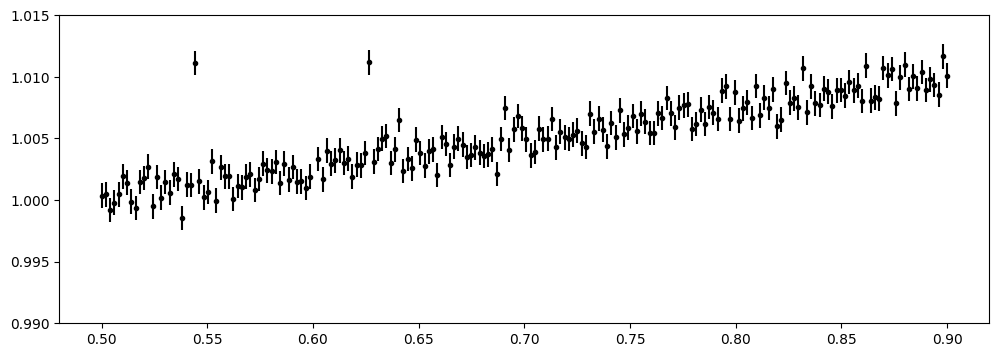

In [2]:
t = np.linspace(0.5,0.9,200)
ferr = 1e-3 * np.ones(len(t))
f = 1 + (ferr * (np.random.randn(len(t))))
f[22] = 1.01 # add a cosmic
f[63] = 1.008 # add a cosmic
f[50] = 0.0 # add a zero flux point
# f[100:120] *= 0.995 # add a transit
f *= np.linspace(1,1.01, len(t)) # add a linear trend for the GP to remove
plt.figure(figsize=(12,4))
plt.errorbar(t,f,ferr,fmt='k.')
plt.ylim(0.99,1.015)

In [3]:
targ = LightCurve(name = "test",
                  time = t,
                  flux = f,
                  uncertainty = np.abs(ferr),
                  metadata={'R_star':0.1*u.R_sun, 'M_star':0.1*u.M_sun})

🌈🤖 Warning! The time array is not an astropy.Time object, therefore there is no info about the 
format or scale.
We will assume that it is JD and TDB from here on!



In [4]:
targ_with_transit = targ.inject_transit(per=5*u.d, epoch=0.7 * u.d, inc=90 * u.degree, rp=1 * u.R_earth, ld=[0.3,0.3])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: xlabel='Time [d]', ylabel='Flux'>

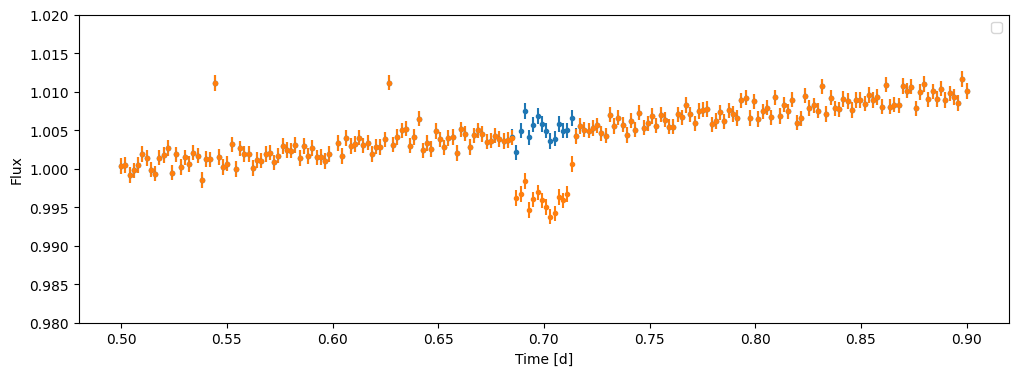

In [5]:
ax=targ.plot()
targ_with_transit.plot(ax=ax)

In [6]:
targ_with_transit.metadata

{'name': 'test_inject',
 'target': 'test',
 'R_star': <Quantity 0.1 solRad>,
 'M_star': <Quantity 0.1 solMass>,
 'injected_planet': {'period': [<Quantity 5. d>],
  'epoch': [<Quantity 0.7 d>],
  'inc': [<Quantity 90. deg>],
  'rp': [<Quantity 1. earthRad>],
  'ld': [[0.3, 0.3]],
  'depth': [<Quantity 0.00840502>],
  'duration': [<Quantity 0.03042218 d>]}}

In [7]:
planets = targ_with_transit.create_lots_of_transit_params(nfake=100, 
                                                          minimum_planet_radius=0.5 * u.R_earth, maximum_planet_radius=3 * u.R_earth,
                                                          minimum_period=0.5 * u.d, maximum_period=1 * u.d,)

In [8]:
planets

,logP,phase,cosi,r_p,depth,duration,epoch,recovered,log_Prec,rec_depth,rec_duration,rec_epoch,run,snr,target,r_s,m_s,teff,spt
0,-0.009817,0.342826,0.001952,2.121308,0.037822132387919385,0.019322,0.835163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
1,-0.211038,0.515876,0.017026,1.433654,0.017275364960095095,0.015340,0.817327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
2,-0.062319,0.019912,0.000228,2.303517,0.044598614913917624,0.018830,0.517250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
3,-0.061141,0.630437,0.008767,1.530700,0.019693323180486944,0.017577,1.047648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
4,-0.124649,0.999883,0.012765,2.909766,0.07116310780297208,0.018530,1.250412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.106498,0.636002,0.005550,0.931327,0.007290258863922903,0.016252,0.997692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
96,-0.289251,0.889341,0.019467,1.325554,0.014768395351225042,0.014308,0.956896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
97,-0.269080,0.153384,0.012093,1.575222,0.02085558302934931,0.015048,0.582547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
98,-0.065188,0.496978,0.000799,2.573803,0.055678717174235254,0.019173,0.927710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None


Masking NaN fluxes...
Masking zero fluxes...
Masking bad weather...
Masking cosmic ray hits...
Fitting rotation with square-exponential GP...
Initial Parameter Vector:  [-6.90775528 -5.83703692 -0.69314718]
Initial Params: AMP =  0.0029174745421663454 , SQEXP=  0.5 , JITTER =  0.0010000000000000002
Initial ln-likelihood: 68.14
Fitted GP HPs: [-31.11436661  -9.1397602   -1.06481527]
Fitted Params: AMP =  0.00010731306031727242 , SQEXP=  0.34479154254615013 , JITTER =  3.070451719989892e-14
Final ln-likelihood: 156.39
Running BLS Search


/Users/catrionamurray/anaconda3/envs/occultence/lib/python3.9/site-packages/occultence/cleaning/clean.py:73: UserWarning:  The LightCurve's timelike dictionary does not appear to have the 'artifical_lightcurve' in it.
                 This array is necessary to calculate bad weather, therefore this will ** not ** be applied!
  warnings.warn(f""" The LightCurve's timelike dictionary does not appear to have the 'artifical_lightcurve' in it.
/Users/catrionamurray/anaconda3/envs/occultence/lib/python3.9/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


Number of Periods Checked:  10000


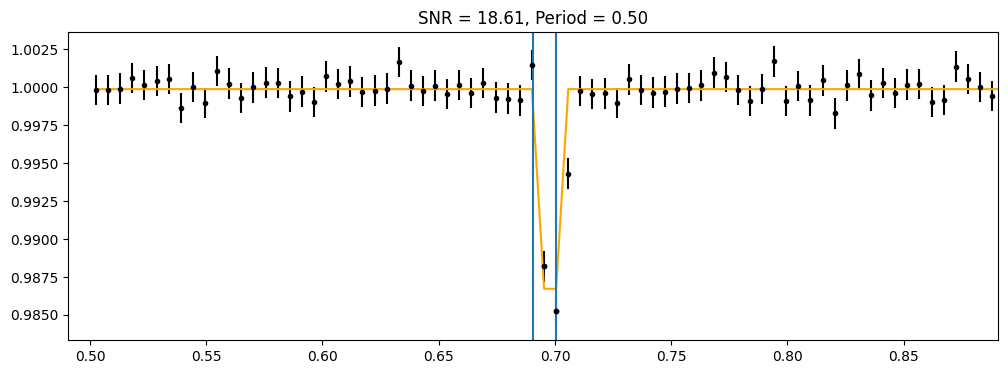

Transit found!
Masking NaN fluxes...
Masking zero fluxes...
Masking bad weather...
Masking cosmic ray hits...
Fitting rotation with square-exponential GP...
Initial Parameter Vector:  [-6.90775528 -5.85552851 -0.69314718]
Initial Params: AMP =  0.0028640215446016884 , SQEXP=  0.5 , JITTER =  0.0010000000000000002
Initial ln-likelihood: 70.67
Fitted GP HPs: [-31.2461579   -9.0853389   -0.94654595]
Fitted Params: AMP =  0.00011331501241743872 , SQEXP=  0.3880791543324246 , JITTER =  2.6913243736983123e-14
Final ln-likelihood: 162.38
Running BLS Search


/Users/catrionamurray/anaconda3/envs/occultence/lib/python3.9/site-packages/occultence/cleaning/clean.py:73: UserWarning:  The LightCurve's timelike dictionary does not appear to have the 'artifical_lightcurve' in it.
                 This array is necessary to calculate bad weather, therefore this will ** not ** be applied!
  warnings.warn(f""" The LightCurve's timelike dictionary does not appear to have the 'artifical_lightcurve' in it.
/Users/catrionamurray/anaconda3/envs/occultence/lib/python3.9/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


Number of Periods Checked:  10000
No transits detected!
No transit found!

Masking NaN fluxes...
Masking zero fluxes...
Masking bad weather...
Masking cosmic ray hits...
Fitting rotation with square-exponential GP...
Initial Parameter Vector:  [-6.90775528 -5.80781167 -0.69314718]
Initial Params: AMP =  0.003003996607529999 , SQEXP=  0.5 , JITTER =  0.0010000000000000002
Initial ln-likelihood: 68.14
Fitted GP HPs: [-27.97154424  -8.92094701  -0.80248211]
Fitted Params: AMP =  0.00013356170014707034 , SQEXP=  0.4482150640765229 , JITTER =  7.113980791680524e-13
Final ln-likelihood: 154.12
Running BLS Search


/Users/catrionamurray/anaconda3/envs/occultence/lib/python3.9/site-packages/occultence/cleaning/clean.py:73: UserWarning:  The LightCurve's timelike dictionary does not appear to have the 'artifical_lightcurve' in it.
                 This array is necessary to calculate bad weather, therefore this will ** not ** be applied!
  warnings.warn(f""" The LightCurve's timelike dictionary does not appear to have the 'artifical_lightcurve' in it.
/Users/catrionamurray/anaconda3/envs/occultence/lib/python3.9/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


Number of Periods Checked:  10000


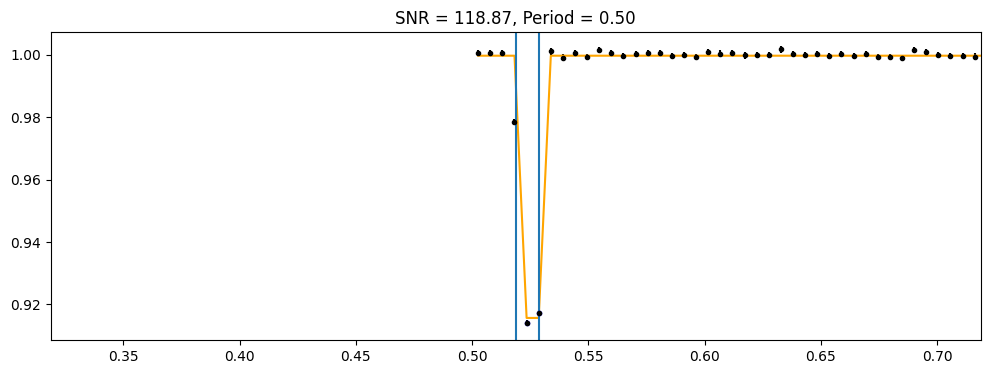

Transit found!


In [16]:
results = targ.full_injection_recovery(nfake=3, pool=False, minimum_planet_radius=0.5 * u.R_earth, maximum_planet_radius=3 * u.R_earth,
                                       minimum_period=0.5 * u.d, maximum_period=0.5 * u.d, recovery_kw = {'condition_on_epoch':1 * u.hour})

In [17]:
results

([<🌟 Lightcurve test_inject0 (200t) 🌟>,
  <🌟 Lightcurve test_inject1 (200t) 🌟>,
  <🌟 Lightcurve test_inject2 (200t) 🌟>],
 [<🌟 Lightcurve test_inject0_clean (197t) 🌟>,
  <🌟 Lightcurve test_inject1_clean (197t) 🌟>,
  <🌟 Lightcurve test_inject2_clean (197t) 🌟>],
 [<🌟 Lightcurve test_inject0_clean_bin_gpdetrend (29t) 🌟>,
  <🌟 Lightcurve test_inject1_clean_bin_gpdetrend (29t) 🌟>,
  <🌟 Lightcurve test_inject2_clean_bin_gpdetrend (29t) 🌟>],
 [<🌟 Lightcurve test_inject0_clean_bin_bls (77t) 🌟>,
  <🌟 Lightcurve test_inject1_clean_bin_bls (77t) 🌟>,
  <🌟 Lightcurve test_inject2_clean_bin_bls (77t) 🌟>],
       logP     phase      cosi       r_p                 depth  duration  \
 0 -0.30103  0.399104  0.011360  1.208356  0.012272366284582682  0.014273   
 1 -0.30103  0.872855  0.006964  2.622528  0.057806786717720646  0.016033   
 2 -0.30103  0.049578  0.001380  2.953132    0.0733000728159615  0.016464   
 
       epoch  recovered  log_Prec  rec_depth  rec_duration  rec_epoch  run  \
 0  0.699552  

In [18]:
results[4]

,logP,phase,cosi,r_p,depth,duration,epoch,recovered,log_Prec,rec_depth,rec_duration,rec_epoch,run,snr,target,r_s,m_s,teff,spt
0,-0.30103,0.399104,0.011360,1.208356,0.012272366284582682,0.014273,0.699552,1.0,0.5,0.013162,0.01,0.695604,0.0,18.614509,test,0.1 solRad,0.1 solMass,None,None
1,-0.30103,0.872855,0.006964,2.622528,0.057806786717720646,0.016033,0.936427,0.0,0.0,0.000000,0.00,0.000000,0.0,0.000000,test,0.1 solRad,0.1 solMass,None,None
2,-0.30103,0.049578,0.001380,2.953132,0.0733000728159615,0.016464,0.524789,1.0,0.5,0.084052,0.01,0.523704,0.0,118.866981,test,0.1 solRad,0.1 solMass,None,None


In [19]:
results[0][0].metadata

{'name': 'test_inject0',
 'target': 'test',
 'R_star': <Quantity 0.1 solRad>,
 'M_star': <Quantity 0.1 solMass>,
 'injected_planet': {'period': [<Quantity 0.5 d>],
  'epoch': [<Quantity 0.69955195 d>],
  'inc': [<Quantity 1.55943566 rad>],
  'rp': [<Quantity 1.20835581 earthRad>],
  'ld': [[0.385, 0.304]],
  'depth': [<Quantity 0.01227237>],
  'duration': [<Quantity 0.01427275 d>]},
 'thresholds': {}}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


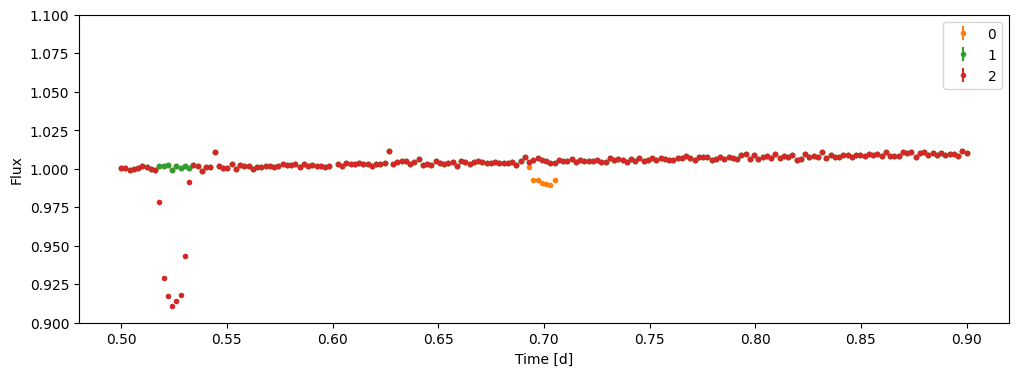

In [20]:
ax=targ.plot()
for i, lc in enumerate(results[0]):
    lc.plot(ax=ax, label=i, ylims=[0.9,1.1])
plt.legend()

For whatever reason the pooling doesn't seem to work in Jupyter on my computer...?

In [21]:
# pool = mp.Pool(5)
# lcs = pool.starmap(inject_transit, [(targ, (10**logp) * u.d, phase * 10**logp * u.d, math.acos(cosi) * u.radian,
#                                               rp * u.R_earth, [0.1,0.1]) for
#                                              logp, phase, cosi, rp in zip(planets['logP'], planets['phase'], planets['cosi'],
#                                                                           planets['r_p'])])

In [22]:
results[3][1].metadata

{'name': 'test_inject1_clean_bin_bls',
 'target': 'test',
 'R_star': <Quantity 0.1 solRad>,
 'M_star': <Quantity 0.1 solMass>,
 'injected_planet': {'period': [<Quantity 0.5 d>],
  'epoch': [<Quantity 0.93642728 d>],
  'inc': [<Quantity 1.56383246 rad>],
  'rp': [<Quantity 2.62252776 earthRad>],
  'ld': [[0.385, 0.304]],
  'depth': [<Quantity 0.05780679>],
  'duration': [<Quantity 0.016033 d>]},
 'thresholds': {},
 'BLS_transits_found': False,
 'BLS_transits_ind': [],
 'BLS_transits_params': {'period': [],
  'depth': [],
  'duration': [],
  'epoch': [],
  'epoch_start': [],
  'epoch_end': [],
  'snr': []}}